In [1]:
import numpy as np

In [2]:
data = np.genfromtxt(r"D:\Applied AI\Datasets and DB\KNN\KNN- DemoDataset\6.overlap.csv", delimiter = ',')
#data[:,:2]

In [3]:
import pandas as pd

In [4]:
# just to compate the result produced by np.genfromtxt method above. They both are same!!!
data_df = pd.read_csv(r"D:\Applied AI\Datasets and DB\KNN\KNN- DemoDataset\6.overlap.csv", header= None)
data_df.columns = ['data1', 'data2', 'class_label']
data_df.head()

,data1,data2,class_label
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


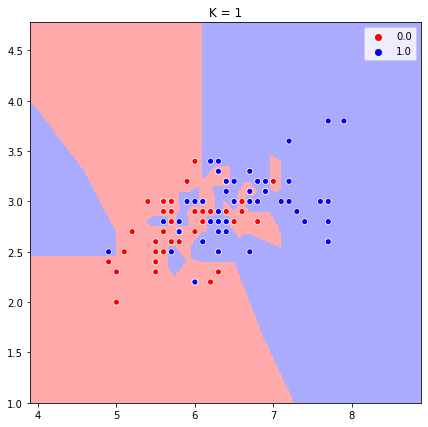

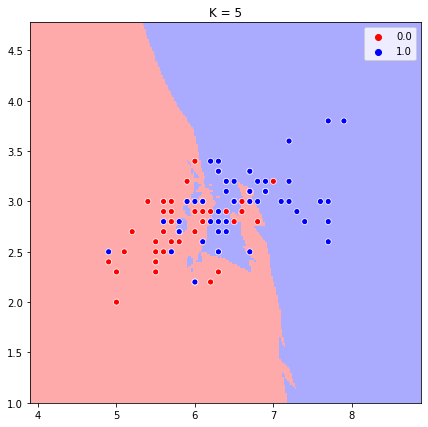

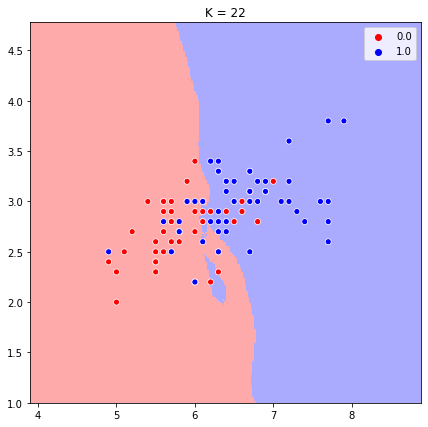

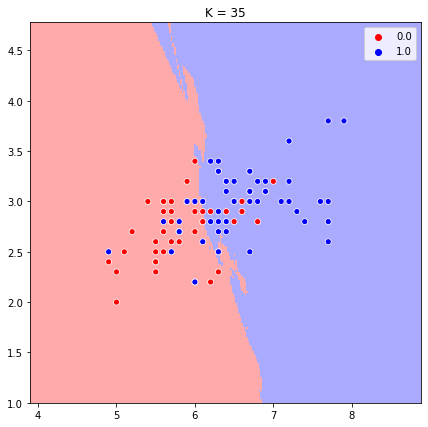

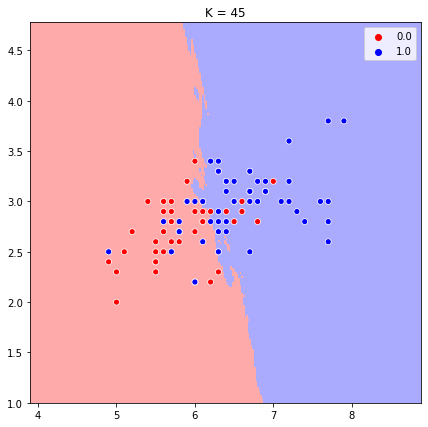

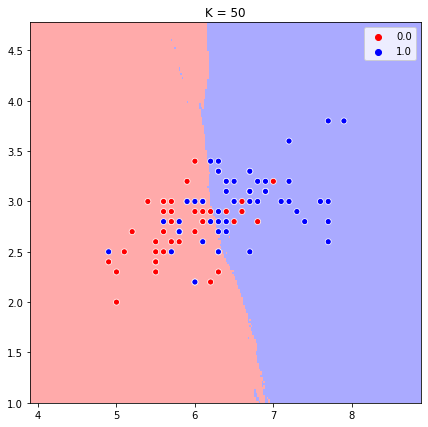

In [11]:
from sklearn import neighbors
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sb
from seaborn import color_palette

decision_surf_color = ListedColormap(['#FFAAAA',  '#AAAAFF'])
dpt_color = color_palette(['#FF0000', '#0000FF'], n_colors = 2)

def knn_comparisons(dataset, nn):
    X = dataset[:,0:2]
    y = dataset[:,2]
    
    clf = neighbors.KNeighborsClassifier(nn, n_jobs = 6)
    clf.fit(X,y)
    
    # constructing the meshgrid. 
    x_min = X[:,0].min()-1
    x_max = X[:,0].max()+1
    y_min = X[:,1].min()-1
    y_max = X[:,1].max()+1
    
    # Here each point xx,yy on the meshgrid represent our query point(Xq)!!!
    xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
#     print("xx shape:",xx.shape)
#     print("yy shape:",yy.shape)
    class_prediction = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     print(class_prediction)
#     print(class_prediction.shape)
    class_prediction = class_prediction.reshape(xx.shape)
    
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, class_prediction, cmap = decision_surf_color)
    #plt.scatter(X[:,0], X[:,1], c=y, cmap = datapoint_colors)
    sb.scatterplot(X[:,0], X[:,1], hue = y, palette = dpt_color)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title("K = "+str(nn))
    plt.show()
    

    
for NN in [1, 5, 22, 35, 45, 50]:
    knn_comparisons(data, NN)

In [6]:
dataset = pd.read_csv(r"D:\Applied AI\Datasets and DB\KNN\KNN- DemoDataset\8.twospirals.csv", sep = ",", names= ['dp1', 'dp2', 'class'])
dataset.head()  

,dp1,dp2,class
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [35]:
from seaborn import color_palette
from matplotlib.colors import ListedColormap


train_pts_palette = color_palette(palette = ['white', 'black'], n_colors = 2)
decisionB_palette = ListedColormap(['#bf00ff', '#00bfff'])

def knn_spiraldata(datapts, nn):
    datapoints = dataset.iloc[:, 0:2].to_numpy()
    class_labels = dataset['class'].to_numpy()
    
    clf = neighbors.KNeighborsClassifier(nn, n_jobs = 6)
    clf.fit(datapoints, class_labels)
    
    x_min = datapoints[:,0].min()-1
    x_max = datapoints[:,0].max()+1
    y_min = datapoints[:,1].min()-1
    y_max = datapoints[:,1].max()+1
    
    xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02), np.arange(y_min, y_max, 0.02))
    
    prediction = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    plt.figure(figsize = (5,5))
    plt.pcolormesh(xx,yy,prediction.reshape(xx.shape), cmap = decisionB_palette)
    
    sb.scatterplot(datapoints[:,0], datapoints[:,1], palette = train_pts_palette, hue = class_labels)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(str(NN)+"-NN")
    
    plt.show()

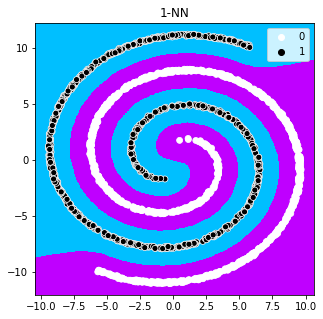

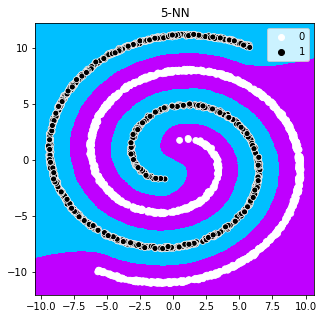

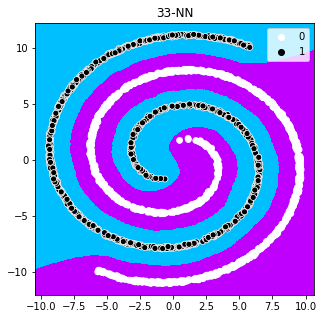

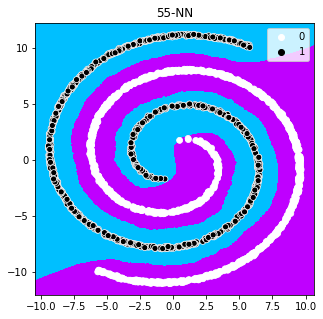

In [36]:
for NN in [1, 5, 33, 55]:
    knn_spiraldata(dataset, NN)